In [2]:
from google.colab import files
files.upload()  # Choose kaggle.json here


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ahmed3b3z","key":"7f844dc563d7b92371e9450f629bdd7a"}'}

In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
!pip install kaggle


In [5]:
!kaggle datasets download -d msambare/fer2013

Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
 86% 52.0M/60.3M [00:00<00:00, 533MB/s]
100% 60.3M/60.3M [00:00<00:00, 418MB/s]


In [6]:
!unzip fer2013.zip


Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

In [7]:
from collections import Counter
import os
data_dir = "train"
class_counts = {}

for emotion in os.listdir(data_dir):
    folder = os.path.join(data_dir, emotion)
    if os.path.isdir(folder):
        class_counts[emotion] = len(os.listdir(folder))

print("Images per class in training set:")
for emotion, count in class_counts.items():
    print(f"{emotion}: {count}")


Images per class in training set:
surprise: 3171
disgust: 436
sad: 4830
neutral: 4965
happy: 7215
fear: 4097
angry: 3995


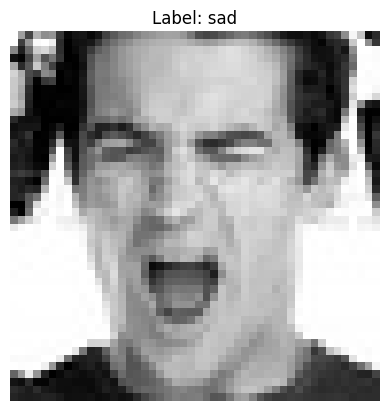

In [8]:
import matplotlib.pyplot as plt
import cv2
import random

emotion = random.choice(os.listdir("train"))
img_path = os.path.join("train", emotion, random.choice(os.listdir(os.path.join("train", emotion))))
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title(f"Label: {emotion}")
plt.axis("off")
plt.show()


In [9]:
import numpy as np

sample_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
print(f"Image shape: {sample_img.shape}")
print(f"Data type: {sample_img.dtype}")


Image shape: (48, 48)
Data type: uint8


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create generator with validation split
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1,
    validation_split=0.2  # Reserve 20% for validation
)

# Test generator (no augmentation, no validation split)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create train generator (80% of train data)
train_generator = train_datagen.flow_from_directory(
    'train/',
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    subset='training',        # This gets the training subset
    shuffle=True
)

# Create validation generator (20% of train data)
validation_generator = train_datagen.flow_from_directory(
    'train/',
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    subset='validation',      # This gets the validation subset
    shuffle=False
)

# Your test generator (from separate test directory)
test_generator = test_datagen.flow_from_directory(
    'test/',
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Check the numbers
print(f"Training samples: {train_generator.samples}")
print(f"Validation samples: {validation_generator.samples}")
print(f"Test samples: {test_generator.samples}")
print(f"Number of classes: {train_generator.num_classes}")

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Training samples: 22968
Validation samples: 5741
Test samples: 7178
Number of classes: 7


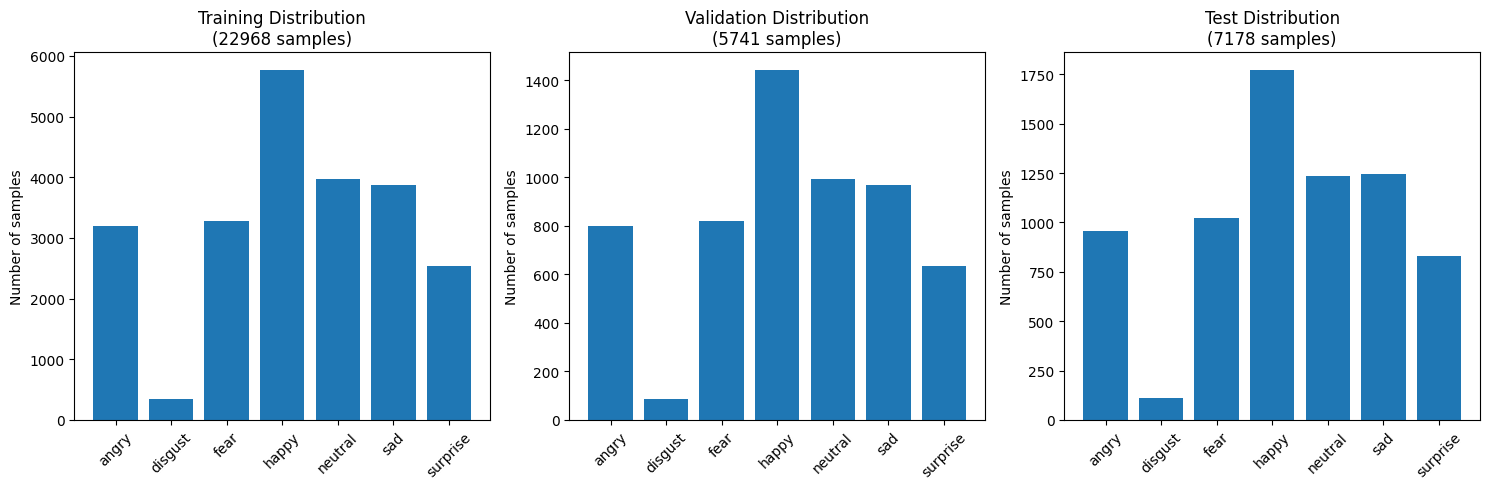


=== CLASS DISTRIBUTION ===
Training set:
  angry: 3196 samples
  disgust: 349 samples
  fear: 3278 samples
  happy: 5772 samples
  neutral: 3972 samples
  sad: 3864 samples
  surprise: 2537 samples

Validation set:
  angry: 799 samples
  disgust: 87 samples
  fear: 819 samples
  happy: 1443 samples
  neutral: 993 samples
  sad: 966 samples
  surprise: 634 samples

Test set:
  angry: 958 samples
  disgust: 111 samples
  fear: 1024 samples
  happy: 1774 samples
  neutral: 1233 samples
  sad: 1247 samples
  surprise: 831 samples

=== CLASS IMBALANCE CHECK ===
angry: 13.9%
disgust: 1.5%
fear: 14.3%
happy: 25.1%
neutral: 17.3%
sad: 16.8%
surprise: 11.0%


In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Get class distribution for training data
train_class_counts = {}
class_labels = list(train_generator.class_indices.keys())

# Count samples per class in training set
for class_name, class_idx in train_generator.class_indices.items():
    count = np.sum(train_generator.classes == class_idx)
    train_class_counts[class_name] = count

# Get class distribution for validation data
val_class_counts = {}
for class_name, class_idx in validation_generator.class_indices.items():
    count = np.sum(validation_generator.classes == class_idx)
    val_class_counts[class_name] = count

# Get class distribution for test data
test_class_counts = {}
for class_name, class_idx in test_generator.class_indices.items():
    count = np.sum(test_generator.classes == class_idx)
    test_class_counts[class_name] = count

# Create visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Training distribution
axes[0].bar(train_class_counts.keys(), train_class_counts.values())
axes[0].set_title(f'Training Distribution\n({train_generator.samples} samples)')
axes[0].set_ylabel('Number of samples')
axes[0].tick_params(axis='x', rotation=45)

# Validation distribution
axes[1].bar(val_class_counts.keys(), val_class_counts.values())
axes[1].set_title(f'Validation Distribution\n({validation_generator.samples} samples)')
axes[1].set_ylabel('Number of samples')
axes[1].tick_params(axis='x', rotation=45)

# Test distribution
axes[2].bar(test_class_counts.keys(), test_class_counts.values())
axes[2].set_title(f'Test Distribution\n({test_generator.samples} samples)')
axes[2].set_ylabel('Number of samples')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print detailed statistics
print("\n=== CLASS DISTRIBUTION ===")
print("Training set:")
for class_name, count in train_class_counts.items():
    print(f"  {class_name}: {count} samples")

print("\nValidation set:")
for class_name, count in val_class_counts.items():
    print(f"  {class_name}: {count} samples")

print("\nTest set:")
for class_name, count in test_class_counts.items():
    print(f"  {class_name}: {count} samples")

# Check for class imbalance
print("\n=== CLASS IMBALANCE CHECK ===")
train_total = sum(train_class_counts.values())
for class_name, count in train_class_counts.items():
    percentage = (count / train_total) * 100
    print(f"{class_name}: {percentage:.1f}%")

In [13]:
from sklearn.utils.class_weight import compute_class_weight

# Step 1: Compute class weights

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights_dict = dict(enumerate(class_weights))
class_weights_dict

{0: np.float64(1.0266404434114071),
 1: np.float64(9.401555464592715),
 2: np.float64(1.0009587727708533),
 3: np.float64(0.5684585684585685),
 4: np.float64(0.826068191627104),
 5: np.float64(0.8491570541259982),
 6: np.float64(1.2933160650937552)}

In [27]:
import tensorflow as tf
from tensorflow.keras.layers import (
    Conv2D,
    MaxPooling2D,
    Flatten,
    Dense,
    Dropout,
    BatchNormalization,
)
from tensorflow.keras.models import Sequential

def vgg16_grayscale(num_classes, input_shape=(48, 48, 1)):
    model = Sequential()

    # Block 1
    model.add(Conv2D(32, (3, 3), padding='same', kernel_initializer='he_normal', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(Conv2D(32, (3, 3), padding='same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(MaxPooling2D((2, 2)))

    # Block 2
    model.add(Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(MaxPooling2D((2, 2)))

    # Block 3
    model.add(Conv2D(128, (3, 3), padding='same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(Conv2D(128, (3, 3), padding='same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(MaxPooling2D((2, 2)))

    # Block 4
    model.add(Conv2D(256, (3, 3), padding='same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(Conv2D(256, (3, 3), padding='same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(MaxPooling2D((2, 2)))

    # Classification head
    model.add(Flatten())
    model.add(Dense(512, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(Dropout(0.3))
    model.add(Dense(num_classes, activation='softmax'))

    return model


In [28]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [29]:
# Get the number of classes from the train generator
num_classes = train_generator.num_classes

# Create the modified VGG-16 model
model = vgg16_grayscale(num_classes, input_shape=(48, 48, 1))

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print the model summary
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)              │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 48, 48, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 6, 6, 256)      │       295,16

 Total params: 2,491,879 (9.51 MB)

 Trainable params: 2,488,423 (9.49 MB)

 Non-trainable params: 3,456 (13.50 KB)

In [30]:
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights_dict = dict(enumerate(class_weights))

# Callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=10,
        restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=5,
        min_lr=0.0001
    ),
    tf.keras.callbacks.ModelCheckpoint(
        'best_vgg16_model.h5',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    )
]

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32,
    class_weight=class_weights_dict,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/30
717/717 ━━━━━━━━━━━━━━━━━━━━ 0s 761ms/step - accuracy: 0.1818 - loss: 2.1466
Epoch 1: val_accuracy improved from -inf to 0.21648, saving model to best_vgg16_model.h5


717/717 ━━━━━━━━━━━━━━━━━━━━ 589s 811ms/step - accuracy: 0.1819 - loss: 2.1465 - val_accuracy: 0.2165 - val_loss: 1.8913 - learning_rate: 0.0010
Epoch 2/30
  1/717 ━━━━━━━━━━━━━━━━━━━━ 8:05 678ms/step - accuracy: 0.1875 - loss: 1.6644

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_accuracy did not improve from 0.21648
717/717 ━━━━━━━━━━━━━━━━━━━━ 36s 49ms/step - accuracy: 0.1875 - loss: 1.6644 - val_accuracy: 0.2100 - val_loss: 1.8964 - learning_rate: 0.0010
Epoch 3/30
717/717 ━━━━━━━━━━━━━━━━━━━━ 0s 765ms/step - accuracy: 0.2730 - loss: 1.8359
Epoch 3: val_accuracy improved from 0.21648 to 0.31372, saving model to best_vgg16_model.h5


717/717 ━━━━━━━━━━━━━━━━━━━━ 584s 814ms/step - accuracy: 0.2730 - loss: 1.8358 - val_accuracy: 0.3137 - val_loss: 1.7395 - learning_rate: 0.0010
Epoch 4/30
  1/717 ━━━━━━━━━━━━━━━━━━━━ 8:06 679ms/step - accuracy: 0.2500 - loss: 1.4099
Epoch 4: val_accuracy improved from 0.31372 to 0.31617, saving model to best_vgg16_model.h5


717/717 ━━━━━━━━━━━━━━━━━━━━ 41s 56ms/step - accuracy: 0.2500 - loss: 1.4099 - val_accuracy: 0.3162 - val_loss: 1.7342 - learning_rate: 0.0010
Epoch 5/30
717/717 ━━━━━━━━━━━━━━━━━━━━ 0s 764ms/step - accuracy: 0.3505 - loss: 1.6529
Epoch 5: val_accuracy improved from 0.31617 to 0.33572, saving model to best_vgg16_model.h5


717/717 ━━━━━━━━━━━━━━━━━━━━ 622s 868ms/step - accuracy: 0.3505 - loss: 1.6528 - val_accuracy: 0.3357 - val_loss: 1.7195 - learning_rate: 0.0010
Epoch 6/30
  1/717 ━━━━━━━━━━━━━━━━━━━━ 8:08 682ms/step - accuracy: 0.4375 - loss: 1.6299
Epoch 6: val_accuracy did not improve from 0.33572
717/717 ━━━━━━━━━━━━━━━━━━━━ 36s 49ms/step - accuracy: 0.4375 - loss: 1.6299 - val_accuracy: 0.3183 - val_loss: 1.7595 - learning_rate: 0.0010
Epoch 7/30
717/717 ━━━━━━━━━━━━━━━━━━━━ 0s 765ms/step - accuracy: 0.4154 - loss: 1.5216
Epoch 7: val_accuracy improved from 0.33572 to 0.40101, saving model to best_vgg16_model.h5


717/717 ━━━━━━━━━━━━━━━━━━━━ 584s 814ms/step - accuracy: 0.4154 - loss: 1.5215 - val_accuracy: 0.4010 - val_loss: 1.5463 - learning_rate: 0.0010
Epoch 8/30
  1/717 ━━━━━━━━━━━━━━━━━━━━ 12:43 1s/step - accuracy: 0.4375 - loss: 1.1763
Epoch 8: val_accuracy improved from 0.40101 to 0.40677, saving model to best_vgg16_model.h5


717/717 ━━━━━━━━━━━━━━━━━━━━ 42s 56ms/step - accuracy: 0.4375 - loss: 1.1763 - val_accuracy: 0.4068 - val_loss: 1.5428 - learning_rate: 0.0010
Epoch 9/30
717/717 ━━━━━━━━━━━━━━━━━━━━ 0s 768ms/step - accuracy: 0.4506 - loss: 1.4203
Epoch 9: val_accuracy did not improve from 0.40677
717/717 ━━━━━━━━━━━━━━━━━━━━ 586s 817ms/step - accuracy: 0.4506 - loss: 1.4204 - val_accuracy: 0.3832 - val_loss: 1.6429 - learning_rate: 0.0010
Epoch 10/30
  1/717 ━━━━━━━━━━━━━━━━━━━━ 8:07 681ms/step - accuracy: 0.5938 - loss: 1.1617
Epoch 10: val_accuracy did not improve from 0.40677
717/717 ━━━━━━━━━━━━━━━━━━━━ 35s 47ms/step - accuracy: 0.5938 - loss: 1.1617 - val_accuracy: 0.3753 - val_loss: 1.6558 - learning_rate: 0.0010
Epoch 11/30
717/717 ━━━━━━━━━━━━━━━━━━━━ 0s 770ms/step - accuracy: 0.4791 - loss: 1.3533
Epoch 11: val_accuracy improved from 0.40677 to 0.50384, saving model to best_vgg16_model.h5


717/717 ━━━━━━━━━━━━━━━━━━━━ 589s 819ms/step - accuracy: 0.4791 - loss: 1.3533 - val_accuracy: 0.5038 - val_loss: 1.3051 - learning_rate: 0.0010
Epoch 12/30
  1/717 ━━━━━━━━━━━━━━━━━━━━ 9:24 788ms/step - accuracy: 0.4688 - loss: 1.1549
Epoch 12: val_accuracy did not improve from 0.50384
717/717 ━━━━━━━━━━━━━━━━━━━━ 41s 56ms/step - accuracy: 0.4688 - loss: 1.1549 - val_accuracy: 0.4928 - val_loss: 1.3132 - learning_rate: 0.0010
Epoch 13/30
717/717 ━━━━━━━━━━━━━━━━━━━━ 0s 762ms/step - accuracy: 0.4789 - loss: 1.3470
Epoch 13: val_accuracy did not improve from 0.50384
717/717 ━━━━━━━━━━━━━━━━━━━━ 635s 811ms/step - accuracy: 0.4789 - loss: 1.3469 - val_accuracy: 0.4815 - val_loss: 1.3291 - learning_rate: 0.0010
Epoch 14/30
  1/717 ━━━━━━━━━━━━━━━━━━━━ 8:03 675ms/step - accuracy: 0.5312 - loss: 1.1597
Epoch 14: val_accuracy did not improve from 0.50384
717/717 ━━━━━━━━━━━━━━━━━━━━ 36s 49ms/step - accuracy: 0.5312 - loss: 1.1597 - val_accuracy: 0.4832 - val_loss: 1.3292 - learning_rate: 0.00

717/717 ━━━━━━━━━━━━━━━━━━━━ 642s 814ms/step - accuracy: 0.5338 - loss: 1.2227 - val_accuracy: 0.5539 - val_loss: 1.1767 - learning_rate: 2.0000e-04
Epoch 18/30
  1/717 ━━━━━━━━━━━━━━━━━━━━ 13:13 1s/step - accuracy: 0.3750 - loss: 1.3732
Epoch 18: val_accuracy did not improve from 0.55395
717/717 ━━━━━━━━━━━━━━━━━━━━ 42s 56ms/step - accuracy: 0.3750 - loss: 1.3732 - val_accuracy: 0.5501 - val_loss: 1.1822 - learning_rate: 2.0000e-04
Epoch 19/30
717/717 ━━━━━━━━━━━━━━━━━━━━ 0s 762ms/step - accuracy: 0.5446 - loss: 1.1546
Epoch 19: val_accuracy improved from 0.55395 to 0.55726, saving model to best_vgg16_model.h5


717/717 ━━━━━━━━━━━━━━━━━━━━ 682s 871ms/step - accuracy: 0.5446 - loss: 1.1545 - val_accuracy: 0.5573 - val_loss: 1.1698 - learning_rate: 2.0000e-04
Epoch 20/30
  1/717 ━━━━━━━━━━━━━━━━━━━━ 7:56 665ms/step - accuracy: 0.4062 - loss: 1.2665
Epoch 20: val_accuracy did not improve from 0.55726
717/717 ━━━━━━━━━━━━━━━━━━━━ 41s 56ms/step - accuracy: 0.4062 - loss: 1.2665 - val_accuracy: 0.5457 - val_loss: 1.1736 - learning_rate: 2.0000e-04
Epoch 21/30
717/717 ━━━━━━━━━━━━━━━━━━━━ 0s 762ms/step - accuracy: 0.5603 - loss: 1.1109
Epoch 21: val_accuracy improved from 0.55726 to 0.55831, saving model to best_vgg16_model.h5


717/717 ━━━━━━━━━━━━━━━━━━━━ 598s 812ms/step - accuracy: 0.5603 - loss: 1.1109 - val_accuracy: 0.5583 - val_loss: 1.1561 - learning_rate: 2.0000e-04
Epoch 22/30
  1/717 ━━━━━━━━━━━━━━━━━━━━ 8:00 671ms/step - accuracy: 0.3438 - loss: 1.4547
Epoch 22: val_accuracy improved from 0.55831 to 0.56267, saving model to best_vgg16_model.h5


717/717 ━━━━━━━━━━━━━━━━━━━━ 36s 49ms/step - accuracy: 0.3438 - loss: 1.4547 - val_accuracy: 0.5627 - val_loss: 1.1494 - learning_rate: 2.0000e-04
Epoch 23/30
717/717 ━━━━━━━━━━━━━━━━━━━━ 0s 762ms/step - accuracy: 0.5701 - loss: 1.0708
Epoch 23: val_accuracy did not improve from 0.56267
717/717 ━━━━━━━━━━━━━━━━━━━━ 585s 811ms/step - accuracy: 0.5701 - loss: 1.0709 - val_accuracy: 0.5571 - val_loss: 1.1496 - learning_rate: 2.0000e-04
Epoch 24/30
  1/717 ━━━━━━━━━━━━━━━━━━━━ 7:44 648ms/step - accuracy: 0.6250 - loss: 0.9886
Epoch 24: val_accuracy did not improve from 0.56267
717/717 ━━━━━━━━━━━━━━━━━━━━ 41s 56ms/step - accuracy: 0.6250 - loss: 0.9886 - val_accuracy: 0.5625 - val_loss: 1.1410 - learning_rate: 2.0000e-04
Epoch 25/30
717/717 ━━━━━━━━━━━━━━━━━━━━ 0s 768ms/step - accuracy: 0.5782 - loss: 1.0779
Epoch 25: val_accuracy did not improve from 0.56267
717/717 ━━━━━━━━━━━━━━━━━━━━ 622s 868ms/step - accuracy: 0.5782 - loss: 1.0779 - val_accuracy: 0.5456 - val_loss: 1.1906 - learning_

717/717 ━━━━━━━━━━━━━━━━━━━━ 623s 834ms/step - accuracy: 0.5843 - loss: 1.0547 - val_accuracy: 0.5733 - val_loss: 1.1149 - learning_rate: 2.0000e-04
Epoch 28/30
  1/717 ━━━━━━━━━━━━━━━━━━━━ 13:06 1s/step - accuracy: 0.5938 - loss: 0.9568
Epoch 28: val_accuracy improved from 0.57332 to 0.57804, saving model to best_vgg16_model.h5


717/717 ━━━━━━━━━━━━━━━━━━━━ 42s 57ms/step - accuracy: 0.5938 - loss: 0.9568 - val_accuracy: 0.5780 - val_loss: 1.1099 - learning_rate: 2.0000e-04
Epoch 29/30
717/717 ━━━━━━━━━━━━━━━━━━━━ 0s 766ms/step - accuracy: 0.5866 - loss: 1.0514
Epoch 29: val_accuracy did not improve from 0.57804
717/717 ━━━━━━━━━━━━━━━━━━━━ 621s 867ms/step - accuracy: 0.5866 - loss: 1.0514 - val_accuracy: 0.5719 - val_loss: 1.1151 - learning_rate: 2.0000e-04
Epoch 30/30
  1/717 ━━━━━━━━━━━━━━━━━━━━ 11:33 969ms/step - accuracy: 0.5938 - loss: 1.1781
Epoch 30: val_accuracy did not improve from 0.57804
717/717 ━━━━━━━━━━━━━━━━━━━━ 41s 56ms/step - accuracy: 0.5938 - loss: 1.1781 - val_accuracy: 0.5733 - val_loss: 1.1169 - learning_rate: 2.0000e-04


In [31]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Detailed evaluation
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Get predictions
test_generator.reset()
predictions = model.predict(test_generator, steps=test_generator.samples // 32 + 1)
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Classification report
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(true_classes, predicted_classes))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


225/225 ━━━━━━━━━━━━━━━━━━━━ 43s 189ms/step - accuracy: 0.5326 - loss: 1.1779
Test Accuracy: 0.5946
225/225 ━━━━━━━━━━━━━━━━━━━━ 42s 186ms/step
Classification Report:
              precision    recall  f1-score   support

       angry       0.51      0.54      0.52       958
     disgust       0.30      0.66      0.41       111
        fear       0.53      0.21      0.30      1024
       happy       0.89      0.76      0.82      1774
     neutral       0.52      0.61      0.56      1233
         sad       0.45      0.55      0.49      1247
    surprise       0.67      0.81      0.74       831

    accuracy                           0.59      7178
   macro avg       0.55      0.59      0.55      7178
weighted avg       0.61      0.59      0.59      7178

Confusion Matrix:
[[ 518   69   41   25  128  146   31]
 [  23   73    1    1    3    7    3]
 [ 145   38  217   26  126  308  164]
 [  70   11   23 1351  154   96   69]
 [  94   13   38   44  751  258   35]
 [ 141   36   58   38  264  

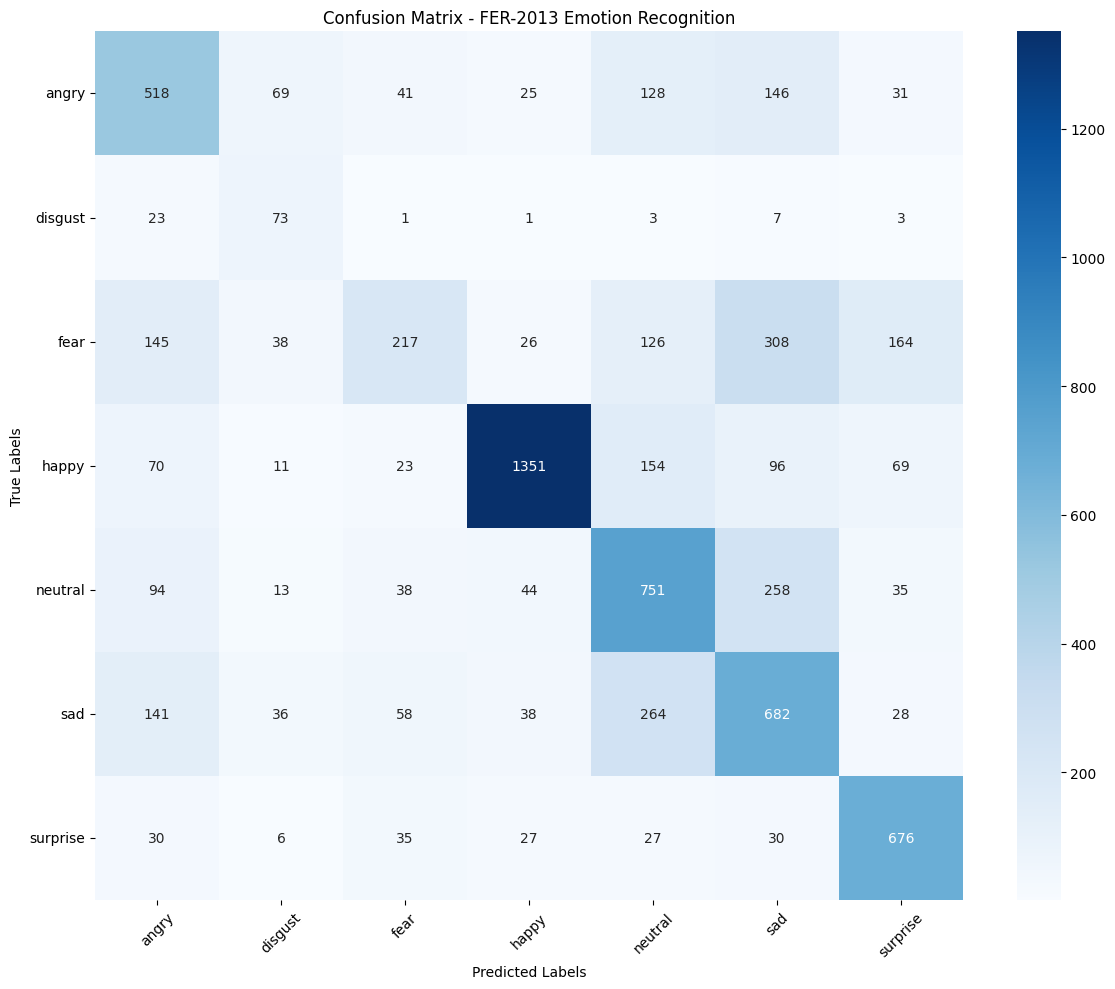

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
# Create confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.title('Confusion Matrix - FER-2013 Emotion Recognition')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

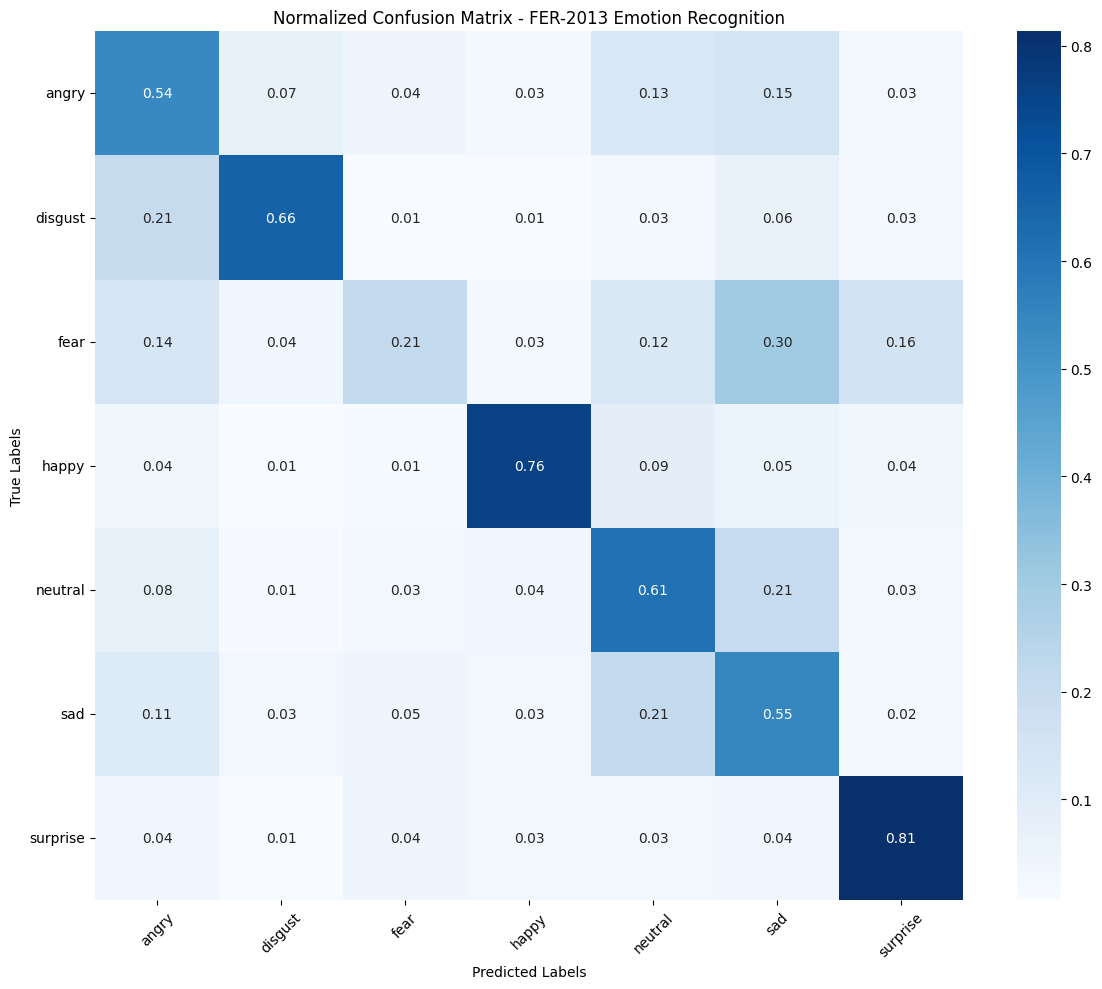

In [35]:

# Normalize confusion matrix for better visualization
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(12, 10))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.title('Normalized Confusion Matrix - FER-2013 Emotion Recognition')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

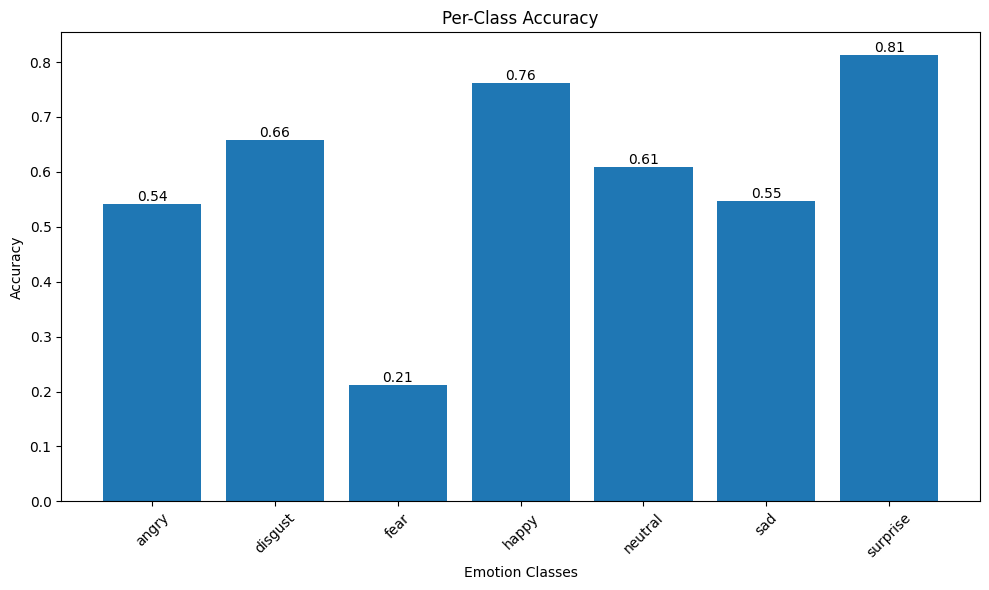

In [36]:
# Per-class accuracy
per_class_accuracy = cm.diagonal() / cm.sum(axis=1)
plt.figure(figsize=(10, 6))
bars = plt.bar(class_labels, per_class_accuracy)
plt.title('Per-Class Accuracy')
plt.xlabel('Emotion Classes')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [37]:

# Print detailed statistics
print("=== DETAILED PERFORMANCE ANALYSIS ===")
print(f"Overall Test Accuracy: {test_accuracy:.4f}")
print("\nPer-Class Performance:")
for i, class_name in enumerate(class_labels):
    precision = cm[i, i] / cm[:, i].sum() if cm[:, i].sum() > 0 else 0
    recall = cm[i, i] / cm[i, :].sum() if cm[i, :].sum() > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    print(f"{class_name:10} - Precision: {precision:.3f}, Recall: {recall:.3f}, F1: {f1:.3f}")

=== DETAILED PERFORMANCE ANALYSIS ===
Overall Test Accuracy: 0.5946

Per-Class Performance:
angry      - Precision: 0.507, Recall: 0.541, F1: 0.523
disgust    - Precision: 0.297, Recall: 0.658, F1: 0.409
fear       - Precision: 0.525, Recall: 0.212, F1: 0.302
happy      - Precision: 0.894, Recall: 0.762, F1: 0.822
neutral    - Precision: 0.517, Recall: 0.609, F1: 0.559
sad        - Precision: 0.447, Recall: 0.547, F1: 0.492
surprise   - Precision: 0.672, Recall: 0.813, F1: 0.736


In [38]:
class_indices = train_generator.class_indices
print("Original class weights:", class_weights_dict)
# Identify indices for fear and disgust
fear_idx = class_indices['fear']
disgust_idx = class_indices['disgust']

Original class weights: {0: np.float64(1.0266404434114071), 1: np.float64(9.401555464592715), 2: np.float64(1.0009587727708533), 3: np.float64(0.5684585684585685), 4: np.float64(0.826068191627104), 5: np.float64(0.8491570541259982), 6: np.float64(1.2933160650937552)}


In [39]:
class_weights_dict[fear_idx] = class_weights_dict[fear_idx] * 2.0    # Double fear weight
class_weights_dict[disgust_idx] = class_weights_dict[disgust_idx] * 1.5  # 50% boost to disgust

print("Boosted class weights:", class_weights_dict)

Boosted class weights: {0: np.float64(1.0266404434114071), 1: np.float64(14.102333196889072), 2: np.float64(2.0019175455417066), 3: np.float64(0.5684585684585685), 4: np.float64(0.826068191627104), 5: np.float64(0.8491570541259982), 6: np.float64(1.2933160650937552)}


In [40]:
# Retrain with boosted weights
history_boosted = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=5,  # Train a bit more
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32,
    class_weight=class_weights_dict,
    callbacks=callbacks  # Use your existing callbacks
)

Epoch 1/5
717/717 ━━━━━━━━━━━━━━━━━━━━ 0s 773ms/step - accuracy: 0.5780 - loss: 1.2391
Epoch 1: val_accuracy did not improve from 0.57804
717/717 ━━━━━━━━━━━━━━━━━━━━ 590s 822ms/step - accuracy: 0.5780 - loss: 1.2391 - val_accuracy: 0.5688 - val_loss: 1.1046 - learning_rate: 2.0000e-04
Epoch 2/5
  1/717 ━━━━━━━━━━━━━━━━━━━━ 8:05 678ms/step - accuracy: 0.5938 - loss: 1.3100

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_accuracy did not improve from 0.57804
717/717 ━━━━━━━━━━━━━━━━━━━━ 36s 49ms/step - accuracy: 0.5938 - loss: 1.3100 - val_accuracy: 0.5665 - val_loss: 1.1124 - learning_rate: 2.0000e-04
Epoch 3/5
717/717 ━━━━━━━━━━━━━━━━━━━━ 0s 773ms/step - accuracy: 0.5635 - loss: 1.2580
Epoch 3: val_accuracy did not improve from 0.57804
717/717 ━━━━━━━━━━━━━━━━━━━━ 622s 867ms/step - accuracy: 0.5635 - loss: 1.2580 - val_accuracy: 0.5616 - val_loss: 1.1338 - learning_rate: 2.0000e-04
Epoch 4/5
  1/717 ━━━━━━━━━━━━━━━━━━━━ 8:10 685ms/step - accuracy: 0.6562 - loss: 0.8300
Epoch 4: val_accuracy did not improve from 0.57804
717/717 ━━━━━━━━━━━━━━━━━━━━ 42s 58ms/step - accuracy: 0.6562 - loss: 0.8300 - val_accuracy: 0.5663 - val_loss: 1.1188 - learning_rate: 2.0000e-04
Epoch 5/5
717/717 ━━━━━━━━━━━━━━━━━━━━ 0s 773ms/step - accuracy: 0.5815 - loss: 1.1923
Epoch 5: val_accuracy did not improve from 0.57804
717/717 ━━━━━━━━━━━━━━━━━━━━ 588s 820ms/step - accuracy: 0.5815 - loss: 1.1923 - val_accu

In [41]:
# Extract training and validation metrics
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the number of epochs
epochs_range = range(1, len(train_acc) + 1)

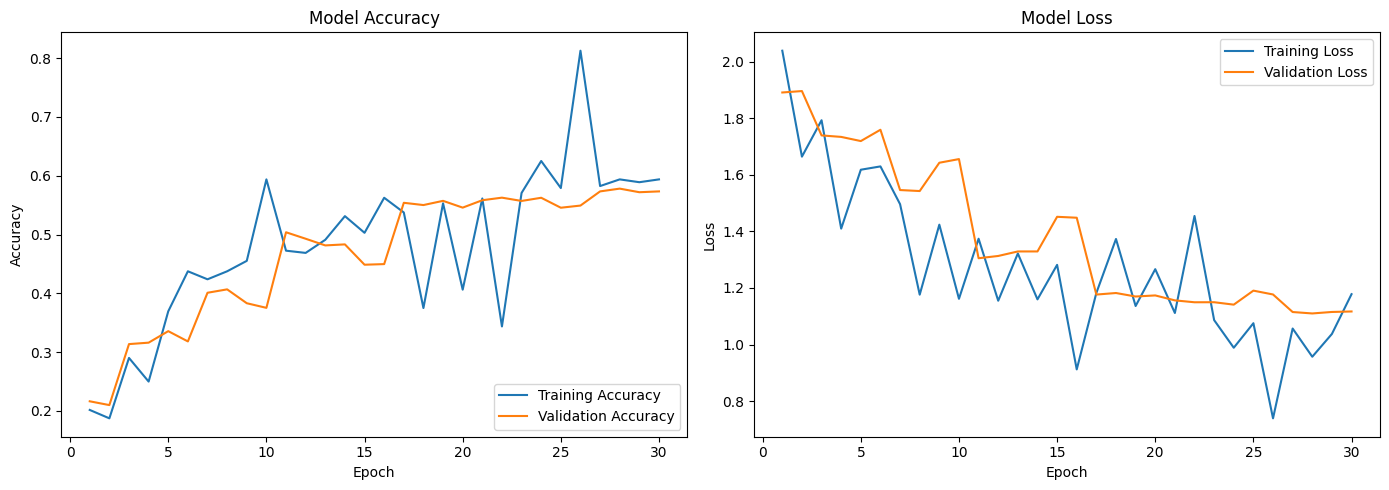

In [42]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Show the plots
plt.tight_layout()
plt.show()